# lab2

In [30]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv('s3://ia-340-2025-fall-lor-99771035/Crime_Incidents_in_the_Last_30_Days.csv') # load the data from s3
df.head() #show the top 5 rows

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,399215.87,138751.20,25079273,2025/08/11 17:39:31+00,DAY,OTHERS,ROBBERY,1800 - 2199 BLOCK OF NORTH CAPITOL STREET,399215.87,138751.20,...,003302 1,3302.0,Precinct 19,38.916628,-77.009042,NaN,2025/05/28 07:40:00+00,2025/05/28 07:45:00+00,786944170,NaN
1,398165.14,143984.58,25115828,2025/07/31 13:51:31+00,DAY,OTHERS,THEFT F/AUTO,500 - 699 BLOCK OF QUACKENBOS STREET NW,398165.14,143984.58,...,001901 2,1901.0,Precinct 58,38.963770,-77.021172,NaN,2025/05/25 23:00:00+00,2025/07/30 11:00:00+00,786945066,NaN
2,398432.56,138758.47,25115842,2025/07/31 13:28:51+00,DAY,OTHERS,THEFT F/AUTO,400 - 499 BLOCK OF U STREET NW,398432.56,138758.47,...,003400 3,3400.0,Precinct 37,38.916693,-77.018074,NaN,2025/07/30 15:30:00+00,2025/07/30 16:00:00+00,786945067,NaN
3,396001.90,138485.84,25117524,2025/08/03 08:06:35+00,MIDNIGHT,OTHERS,THEFT F/AUTO,1800 - 1805 BLOCK OF CONNECTICUT AVENUE NW,396001.90,138485.84,...,004202 2,4202.0,Precinct 14,38.914229,-77.046100,DUPONT CIRCLE,2025/08/03 07:38:00+00,NaN,786945068,NaN
4,398109.76,141981.47,25120116,2025/08/08 02:44:27+00,EVENING,OTHERS,MOTOR VEHICLE THEFT,4500 - 4599 BLOCK OF 7TH STREET NW,398109.76,141981.47,...,002400 2,2400.0,Precinct 46,38.945726,-77.021805,NaN,2025/08/07 20:20:00+00,2025/08/07 21:00:00+00,786945225,NaN


In [11]:
df.shape #show the number of rows and columns 

(2333, 25)

In [12]:
df.info() # shows the data types and number of null values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     2333 non-null   float64
 1   Y                     2333 non-null   float64
 2   CCN                   2333 non-null   int64  
 3   REPORT_DAT            2333 non-null   object 
 4   SHIFT                 2333 non-null   object 
 5   METHOD                2333 non-null   object 
 6   OFFENSE               2333 non-null   object 
 7   BLOCK                 2333 non-null   object 
 8   XBLOCK                2333 non-null   float64
 9   YBLOCK                2333 non-null   float64
 10  WARD                  2331 non-null   float64
 11  ANC                   2331 non-null   object 
 12  DISTRICT              2318 non-null   float64
 13  PSA                   2318 non-null   float64
 14  NEIGHBORHOOD_CLUSTER  2331 non-null   object 
 15  BLOCK_GROUP          

In [13]:
df.describe() #statistical summary of the data

,X,Y,CCN,XBLOCK,YBLOCK,WARD,DISTRICT,PSA,CENSUS_TRACT,LATITUDE,LONGITUDE,OBJECTID,OCTO_RECORD_ID
count,2333.000000,2333.000000,2.333000e+03,2333.000000,2333.000000,2331.000000,2318.000000,2318.000000,2329.000000,2333.000000,2333.000000,2.333000e+03,0.0
mean,399008.360097,138101.730971,2.517296e+07,399008.360097,138101.730971,4.283998,3.475841,352.129853,6927.361099,38.910772,-77.011440,7.873462e+08,NaN
std,3053.721186,3316.944294,1.144611e+05,3053.721186,3316.944294,2.245261,1.798209,179.463825,28717.726908,0.029879,0.035210,1.048012e+05,NaN
min,390592.100000,127300.240000,2.507927e+07,390592.100000,127300.240000,1.000000,1.000000,101.000000,101.000000,38.813473,-77.108504,7.869442e+08,NaN
25%,397162.060000,136543.720000,2.511735e+07,397162.060000,136543.720000,2.000000,2.000000,206.000000,3400.000000,38.896740,-77.032730,7.872527e+08,NaN
50%,398597.100000,137857.640000,2.512224e+07,398597.100000,137857.639997,4.000000,3.000000,307.000000,6700.000000,38.908576,-77.016174,7.872802e+08,NaN
75%,400840.660000,139991.730000,2.512761e+07,400840.660000,139991.730000,6.000000,5.000000,503.000000,9000.000000,38.927796,-76.990306,7.874639e+08,NaN
max,407656.273300,147223.030000,2.542364e+07,407656.273317,147223.030000,8.000000,7.000000,708.000000,980000.000000,38.992938,-76.911744,7.875041e+08,NaN


In [14]:
df.tail() #show the bottom 5 rows

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
2328,398945.5700,138345.6600,25125777,2025/08/18 14:45:16+00,DAY,OTHERS,THEFT/OTHER,1700 - 1721 BLOCK OF 1ST STREET NW,398945.570000,138345.660000,...,003302 2,3302.0,Precinct 19,38.912975,-77.012158,NaN,2025/08/17 14:20:00+00,2025/08/17 14:30:00+00,787504133,NaN
2329,405565.6283,135913.9452,25125838,2025/08/18 20:40:10+00,EVENING,OTHERS,THEFT F/AUTO,2 - 199 BLOCK OF 46TH PLACE NE,405565.628291,135913.945244,...,007803 3,7803.0,Precinct 98,38.891052,-76.935846,NaN,2025/08/18 16:03:00+00,2025/08/18 18:00:00+00,787504134,NaN
2330,397359.2900,142025.9200,25125867,2025/08/18 18:12:29+00,DAY,OTHERS,THEFT/OTHER,1300 - 1331 BLOCK OF BUCHANAN STREET NW,397359.290000,142025.920000,...,002501 1,2501.0,Precinct 48,38.946124,-77.030462,NaN,2025/08/18 17:39:00+00,NaN,787504135,NaN
2331,398010.1700,138058.3300,25126497,2025/08/19 20:17:56+00,EVENING,OTHERS,THEFT F/AUTO,1500 - 1599 BLOCK OF 8TH STREET NW,398010.170000,138058.330000,...,004901 2,4901.0,Precinct 18,38.910385,-77.022942,NaN,2025/08/19 19:20:00+00,NaN,787504136,NaN
2332,402486.5434,131539.4476,25128105,2025/08/22 23:56:00+00,EVENING,OTHERS,BURGLARY,2337 - 2435 BLOCK OF ALABAMA AVENUE SE,402486.543360,131539.447639,...,007408 1,7408.0,Precinct 115,38.851659,-76.971354,NaN,2025/08/22 21:15:00+00,2025/08/22 23:06:00+00,787504137,NaN


In [31]:
#rename columns
df = df.rename(columns={"SHIFT": "TIME OF DAY", }) 
df.head()

,X,Y,CCN,REPORT_DAT,TIME OF DAY,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,399215.87,138751.20,25079273,2025/08/11 17:39:31+00,DAY,OTHERS,ROBBERY,1800 - 2199 BLOCK OF NORTH CAPITOL STREET,399215.87,138751.20,...,003302 1,3302.0,Precinct 19,38.916628,-77.009042,NaN,2025/05/28 07:40:00+00,2025/05/28 07:45:00+00,786944170,NaN
1,398165.14,143984.58,25115828,2025/07/31 13:51:31+00,DAY,OTHERS,THEFT F/AUTO,500 - 699 BLOCK OF QUACKENBOS STREET NW,398165.14,143984.58,...,001901 2,1901.0,Precinct 58,38.963770,-77.021172,NaN,2025/05/25 23:00:00+00,2025/07/30 11:00:00+00,786945066,NaN
2,398432.56,138758.47,25115842,2025/07/31 13:28:51+00,DAY,OTHERS,THEFT F/AUTO,400 - 499 BLOCK OF U STREET NW,398432.56,138758.47,...,003400 3,3400.0,Precinct 37,38.916693,-77.018074,NaN,2025/07/30 15:30:00+00,2025/07/30 16:00:00+00,786945067,NaN
3,396001.90,138485.84,25117524,2025/08/03 08:06:35+00,MIDNIGHT,OTHERS,THEFT F/AUTO,1800 - 1805 BLOCK OF CONNECTICUT AVENUE NW,396001.90,138485.84,...,004202 2,4202.0,Precinct 14,38.914229,-77.046100,DUPONT CIRCLE,2025/08/03 07:38:00+00,NaN,786945068,NaN
4,398109.76,141981.47,25120116,2025/08/08 02:44:27+00,EVENING,OTHERS,MOTOR VEHICLE THEFT,4500 - 4599 BLOCK OF 7TH STREET NW,398109.76,141981.47,...,002400 2,2400.0,Precinct 46,38.945726,-77.021805,NaN,2025/08/07 20:20:00+00,2025/08/07 21:00:00+00,786945225,NaN


In [16]:
df.isnull().sum() #show the number of rows containing null value

X                          0
Y                          0
CCN                        0
REPORT_DAT                 0
TIME OF DAY                0
METHOD                     0
OFFENSE                    0
BLOCK                      0
XBLOCK                     0
YBLOCK                     0
WARD                       2
ANC                        2
DISTRICT                  15
PSA                       15
NEIGHBORHOOD_CLUSTER       2
BLOCK_GROUP                4
CENSUS_TRACT               4
VOTING_PRECINCT            2
LATITUDE                   0
LONGITUDE                  0
BID                     1853
START_DATE                 0
END_DATE                 162
OBJECTID                   0
OCTO_RECORD_ID          2333
dtype: int64

In [32]:
df.dropna() #no rows were dropped because there was no missing data

,X,Y,CCN,REPORT_DAT,TIME OF DAY,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID


 I renamed "shift" column to "time of day", i found no missing values, therefore required no cleaning

In [33]:
df['OFFENSE'] #select a column 

0                   ROBBERY
1              THEFT F/AUTO
2              THEFT F/AUTO
3              THEFT F/AUTO
4       MOTOR VEHICLE THEFT
               ...         
2328            THEFT/OTHER
2329           THEFT F/AUTO
2330            THEFT/OTHER
2331           THEFT F/AUTO
2332               BURGLARY
Name: OFFENSE, Length: 2333, dtype: object

In [34]:
df.sort_values(by='CENSUS_TRACT') #sort data by a column

,X,Y,CCN,REPORT_DAT,TIME OF DAY,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
866,395423.6200,138083.3800,25423262,2025/08/09 17:32:26+00,DAY,OTHERS,THEFT/OTHER,2300 - 2699 BLOCK OF Q STREET NW,395423.620000,138083.380000,...,000101 1,101.0,Precinct 5,38.910601,-77.052765,NaN,2025/07/28 00:00:00+00,2025/07/28 15:00:00+00,787262519,NaN
367,395423.6200,138083.3800,25423329,2025/08/13 13:03:10+00,DAY,OTHERS,THEFT/OTHER,2300 - 2699 BLOCK OF Q STREET NW,395423.620000,138083.380000,...,000101 1,101.0,Precinct 5,38.910601,-77.052765,NaN,2025/08/07 12:35:00+00,2025/08/08 01:00:00+00,787249245,NaN
2276,395138.5800,138079.3100,25115880,2025/07/31 14:54:40+00,DAY,OTHERS,THEFT/OTHER,2700 - 2799 BLOCK OF Q STREET NW,395138.580000,138079.310000,...,000101 1,101.0,Precinct 5,38.910562,-77.056052,NaN,2025/07/31 13:30:00+00,2025/07/31 14:00:00+00,787502818,NaN
49,394432.6600,137907.4100,25422882,2025/08/01 12:31:13+00,DAY,OTHERS,THEFT/OTHER,1417 - 1510 BLOCK OF WISCONSIN AVENUE NW,394432.660000,137907.410000,...,000102 2,102.0,Precinct 5,38.909010,-77.064189,GEORGETOWN,2025/06/18 17:38:00+00,2025/06/18 17:44:00+00,787226275,NaN
1085,394694.5000,137385.7400,25423308,2025/08/12 20:32:19+00,EVENING,OTHERS,THEFT/OTHER,1026 - 1099 BLOCK OF 31ST STREET NW,394694.500000,137385.740000,...,000102 3,102.0,Precinct 5,38.904312,-77.061167,NaN,2025/06/19 19:00:00+00,2025/06/24 19:00:00+00,787277286,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,397180.6800,135651.6700,25129179,2025/08/24 22:50:32+00,EVENING,OTHERS,MOTOR VEHICLE THEFT,1400 - 1499 BLOCK OF JEFFERSON DRIVE SW,397180.680000,135651.670000,...,980000 1,980000.0,Precinct 129,38.888702,-77.032497,NaN,2025/08/23 20:26:00+00,2025/08/24 21:16:00+00,787284673,NaN
446,393557.4700,137646.3000,25113724,2025/07/27 23:57:41+00,EVENING,OTHERS,THEFT/OTHER,3780 - 3799 BLOCK OF LIBRARY WALK NW,393557.470000,137646.300000,...,NaN,NaN,NaN,38.906652,-77.074278,NaN,2025/07/27 18:43:00+00,2025/07/27 21:28:00+00,787250665,NaN
688,398889.0364,145108.4991,25126049,2025/08/19 03:01:22+00,MIDNIGHT,OTHERS,MOTOR VEHICLE THEFT,EASTERN AVENUE NW AND LAUREL STREET NW,398889.036413,145108.499140,...,NaN,NaN,Precinct 63,38.973896,-77.012821,NaN,2025/08/18 22:43:00+00,2025/08/18 23:30:00+00,787254183,NaN
1267,397497.2100,137709.6300,25120404,2025/08/08 15:54:31+00,DAY,OTHERS,THEFT/OTHER,1200 - 1299 BLOCK OF N STREET NW,397497.210000,137709.630000,...,NaN,NaN,NaN,38.907242,-77.028856,NaN,2025/08/08 15:19:00+00,2025/08/08 15:50:00+00,787373176,NaN


In [35]:
df[6:9] #slice by rows

,X,Y,CCN,REPORT_DAT,TIME OF DAY,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
6,398098.85,136808.92,25121631,2025/08/10 21:45:26+00,EVENING,OTHERS,THEFT/OTHER,700 - 799 BLOCK OF 7TH STREET NW,398098.85,136808.92,...,005801 2,5801.0,Precinct 129,38.899130,-77.021917,DOWNTOWN,2025/08/10 17:15:00+00,2025/08/10 19:24:00+00,786945622,NaN
7,397216.27,137538.44,25114641,2025/07/29 14:39:27+00,DAY,OTHERS,THEFT F/AUTO,1300 - 1499 BLOCK OF MASSACHUSETTS AVENUE NW,397216.27,137538.44,...,010100 3,10100.0,Precinct 17,38.905699,-77.032094,DOWNTOWN,2025/07/29 12:20:00+00,2025/07/29 12:20:00+00,786945913,NaN
8,405371.67,133631.61,25115233,2025/07/30 13:11:17+00,DAY,OTHERS,MOTOR VEHICLE THEFT,4300 - 4313 BLOCK OF SOUTHERN AVENUE SE,405371.67,133631.61,...,009902 1,9902.0,Precinct 106,38.870493,-76.938100,NaN,2025/07/03 15:00:00+00,2025/07/03 16:00:00+00,786945914,NaN


In [51]:
df[df['CENSUS_TRACT']>10000] # select rows by values 

,X,Y,CCN,REPORT_DAT,TIME OF DAY,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
7,397216.2700,137538.4400,25114641,2025/07/29 14:39:27+00,DAY,OTHERS,THEFT F/AUTO,1300 - 1499 BLOCK OF MASSACHUSETTS AVENUE NW,397216.270000,137538.440000,...,010100 3,10100.0,Precinct 17,38.905699,-77.032094,DOWNTOWN,2025/07/29 12:20:00+00,2025/07/29 12:20:00+00,786945913,NaN
16,399351.7200,137531.6800,25121017,2025/08/09 16:16:03+00,DAY,OTHERS,MOTOR VEHICLE THEFT,1 - 99 BLOCK OF M STREET NE,399351.720000,137531.680000,...,010603 2,10603.0,Precinct 144,38.905642,-77.007474,NOMA,2025/08/09 15:37:00+00,2025/08/09 16:16:00+00,787224607,NaN
18,402638.4000,139982.9100,25121866,2025/08/11 03:59:02+00,MIDNIGHT,OTHERS,MOTOR VEHICLE THEFT,2600 - 2699 BLOCK OF HAMLIN STREET NE,402638.400000,139982.910000,...,011100 2,11100.0,Precinct 71,38.927720,-76.969572,NaN,2025/08/11 02:00:00+00,2025/08/11 02:30:00+00,787224609,NaN
34,402307.3100,139388.5900,25128145,2025/08/22 22:38:40+00,EVENING,OTHERS,THEFT F/AUTO,2200 - 2399 BLOCK OF CHANNING STREET NE,402307.310000,139388.590000,...,011100 3,11100.0,Precinct 72,38.922367,-76.973393,NaN,2025/08/16 18:15:00+00,2025/08/16 18:16:00+00,787225001,NaN
37,399887.3800,137425.4900,25128540,2025/08/23 19:43:38+00,EVENING,OTHERS,THEFT/OTHER,1100 - 1199 BLOCK OF ABBEY PLACE NE,399887.380000,137425.490000,...,010602 4,10602.0,Precinct 144,38.904686,-77.001298,NaN,2025/08/18 18:00:00+00,2025/08/21 20:00:00+00,787225004,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2294,396559.2700,137255.0400,25120911,2025/08/09 11:43:33+00,DAY,OTHERS,THEFT F/AUTO,1000 - 1099 BLOCK OF CONNECTICUT AVENUE NW,396559.270000,137255.040000,...,010700 1,10700.0,Precinct 17,38.903144,-77.039667,GOLDEN TRIANGLE,2025/08/09 09:07:00+00,2025/08/09 10:54:00+00,787503053,NaN
2299,398794.0400,127300.2400,25423092,2025/08/07 11:02:37+00,DAY,OTHERS,THEFT/OTHER,1 - 99 BLOCK OF DC VILLAGE LANE SW,398794.040000,127300.240000,...,010900 2,10900.0,Precinct 126,38.813473,-77.013886,NaN,2025/06/16 01:40:00+00,2025/06/20 01:40:00+00,787503085,NaN
2310,397171.1100,137408.2500,25114579,2025/07/29 09:39:29+00,MIDNIGHT,OTHERS,THEFT/OTHER,1100 - 1199 BLOCK OF VERMONT AVENUE NW,397171.110000,137408.250000,...,010100 3,10100.0,Precinct 17,38.904526,-77.032614,DOWNTOWN,2025/07/29 07:52:00+00,2025/07/29 08:34:00+00,787503805,NaN
2311,399218.2142,128170.4793,25116492,2025/08/01 16:38:52+00,DAY,OTHERS,MOTOR VEHICLE THEFT,100 - 199 BLOCK OF IVANHOE STREET SW,399218.214237,128170.479348,...,010900 1,10900.0,Precinct 126,38.821313,-77.009003,NaN,2025/07/30 07:00:00+00,2025/08/01 16:00:00+00,787503806,NaN


In [37]:
df.columns

Index(['X', 'Y', 'CCN', 'REPORT_DAT', 'TIME OF DAY', 'METHOD', 'OFFENSE',
       'BLOCK', 'XBLOCK', 'YBLOCK', 'WARD', 'ANC', 'DISTRICT', 'PSA',
       'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 'CENSUS_TRACT',
       'VOTING_PRECINCT', 'LATITUDE', 'LONGITUDE', 'BID', 'START_DATE',
       'END_DATE', 'OBJECTID', 'OCTO_RECORD_ID'],
      dtype='object')

# I selected the offense column, sorted the values by census tract (to draw conclusions from the data), and filtered census tract groups that are of the same value (which would be useful for drawing conclusions on the actions of certain areas and groups)


In [65]:
sum_OFFENSE_by_TIMEOFDAY = df.groupby('TIME OF DAY')['OFFENSE'].count() #calculate the amount of offenses by the time of day(SHIFT)

Text(0.5, 1.0, 'Offenses by Time of Day')

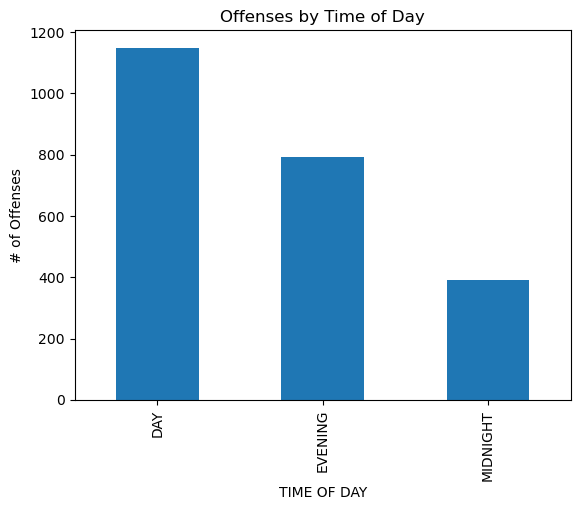

In [79]:
sum_OFFENSE_by_TIMEOFDAY.plot(kind='bar')
plt.ylabel('# of Offenses')
plt.title('Offenses by Time of Day')

This visiualization showcases a interesting insight on how often crimes occur and at what point in the day do they most often happen. This bar graph does a satisfactory job showcasing that the majoriy of offenses occur during the day, despite many people possibly thinking that they occur at a rate higher at at night. 

In [75]:
sum_OFFENSE_by_censustract = df.groupby('OFFENSE')['CENSUS_TRACT'].count() #calculate what offense certain groups of people(census) commit 

Text(0.5, 1.0, 'The Offenses Census Groups Commit')

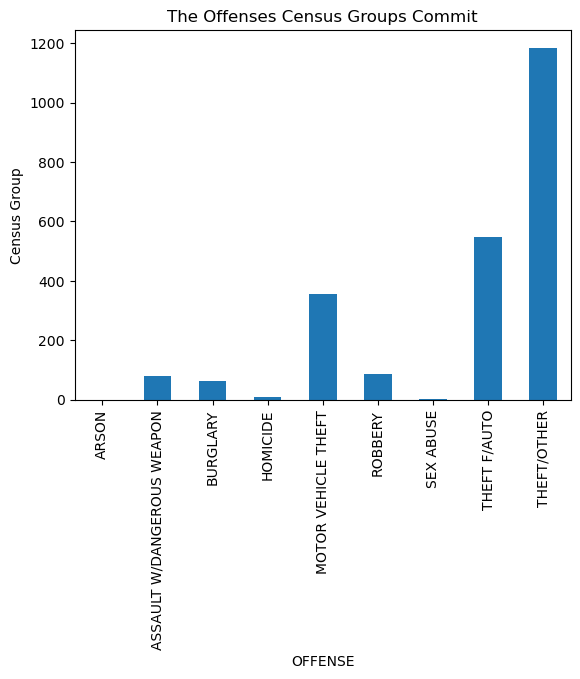

In [80]:
sum_OFFENSE_by_censustract.plot(kind='bar')
plt.ylabel('Census Group')
plt.title('The Offenses Census Groups Commit')

This visualization is useful for insights into the type of crimes that individual census groups oftentimes commit. A noticable pattern within the visualization is that census groups near 1,000 are more likely to commit theft and petty crime. Additionally, you could then analyze that area the group lives in and determine motivations.